---
title: "Structures - Network analysis"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-03-11"
categories: [python, datacamp, network analysis, machine learning, NetworkX]
image: "structureNetworkAnalysis.png"

---

# Structures - Network analysis

We will learn how to find interesting structures within network data by studying concepts such as cliques, communities, and subgraphs. This exercise will leverage your skills you acquired earlier in network analysis. We will apply the concepts we've learned in this chapter to a real-world case study by the end of this chapter.

This **Structures** is part of [Datacamp course: Introduction to Network Analysis in Python]

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Introduction to Network Analysis in Python]: (https://app.datacamp.com/learn/courses/introduction-to-network-analysis-in-python)

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
T = pd.read_pickle('dataset/ego-twitter.p')

# Cliques & communities

![Strcuture-1](Structure-1.png)

## Identifying triangle relationships

Now that you’ve learned about cliques, it’s time to try leveraging what you know to find structures in a network. Triangles are what you’ll go for first. We may be interested in triangles because they’re the simplest complex clique. Let’s write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In [3]:
# check if node 3 is connect with node 4
T.has_edge(3, 4)

False

In [4]:
T.has_edge(1, 3)

True

In [5]:
from itertools import combinations

combinations(T.neighbors(1), 2)

In [6]:
# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

## Finding nodes involved in triangles

NetworkX provides an API for counting the number of triangles that every node is involved in: nx.triangles(G). It returns a dictionary of nodes as the keys and number of triangles as the values.

In [8]:
# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes



In [9]:
# Write the assertion statement
assert len(nodes_in_triangle(T, 1)) == 35

AssertionError: 

## Finding open triangles

Let us now move on to finding open triangles! Recall that they form the basis of friend recommendation systems; if “A” knows “B” and “A” knows “C”, then it’s probable that “B” also knows “C

In [10]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

908


# Maximal cliques

## Finding all maximal cliques of size “n”

Now that you’ve explored triangles (and open triangles), let’s move on to the concept of maximal cliques. Maximal cliques are cliques that cannot be extended by adding an adjacent edge, and are a useful property of the graph when finding communities. NetworkX provides a function that allows you to identify the nodes involved in each maximal clique in a graph: nx.find_cliques(G).

In [12]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs



In [13]:
# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(T, 3)) == 33

NetworkXNotImplemented: not implemented for directed type

# Subgraphs

## Subgraphs I

There may be times when you just want to analyze a subset of nodes in a network. To do so, you can copy them out into another graph object using G.subgraph(nodes), which returns a new graph object (of the same type as the original graph) that is comprised of the iterable of nodes that was passed in.

nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show()

## subgaph II

Using a list comprehension, extract nodes that have the metadata 'occupation' as 'celebrity' alongside their neighbors:

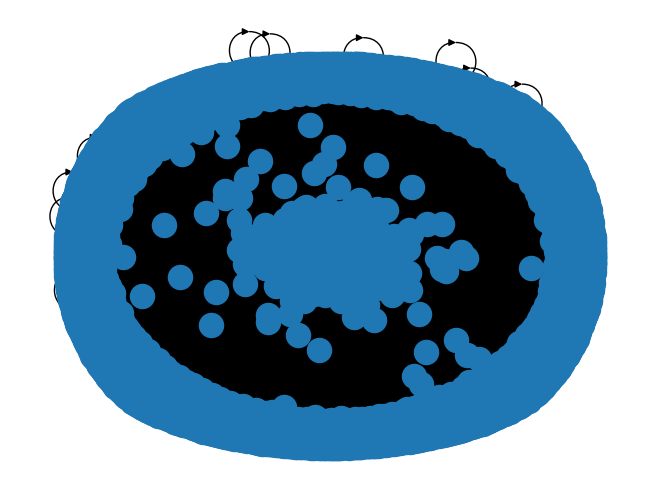

In [15]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()